In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [15]:
# mask rcnn r50 fpn 3x 

# 병변이 없는 데이터도 학습에 추가한 경우 (normal 포함) 
annv1_model_df = pd.read_csv('/ai-data/chest/kjs2109/baseline/detectron2-baseline/weight_dir/Misc/My_annv1_MRCNN_BORA_EVAL_1Findings_3gpus_512bs_8workers_MRCNN_1024_0.0001LR_WCLR_mask_rcnn_R_50_FPN_3x_gn/eval_csvs/_eval_data_v2/Pneumothorax_dsc_based_probs_v2.csv')

# 병변이 있는 데이터로만 학습한 경우 
ann_model_df = pd.read_csv('/ai-data/chest/kjs2109/baseline/detectron2-baseline/weight_dir/MRCNN/MY_ann_MRCNN_BORA_EVAL_1Findings_1gpus_512bs_8workers_MRCNN_1024_0.0001LR_WCLR_mask_rcnn_R_50_FPN_3x_gn/eval_csvs/_eval_data_v2-model_best_0.0948/Pneumothorax_dsc_based_probs_v2.csv') 

len(annv1_model_df), len(ann_model_df) 

(17645, 17645)

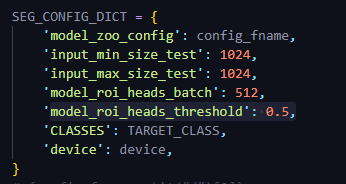

In [16]:
annv1_model_df.loc[annv1_model_df['Probability'] != 0, 'Probability'].min(), annv1_model_df.loc[annv1_model_df['Probability'] != 0, 'Probability'].max()

(0.502167284488678, 0.9788967967033386)

In [17]:
ann_model_df.loc[ann_model_df['Probability'] != 0, 'Probability'].min(), ann_model_df.loc[ann_model_df['Probability'] != 0, 'Probability'].max()

(0.5000040531158447, 0.997932195663452)

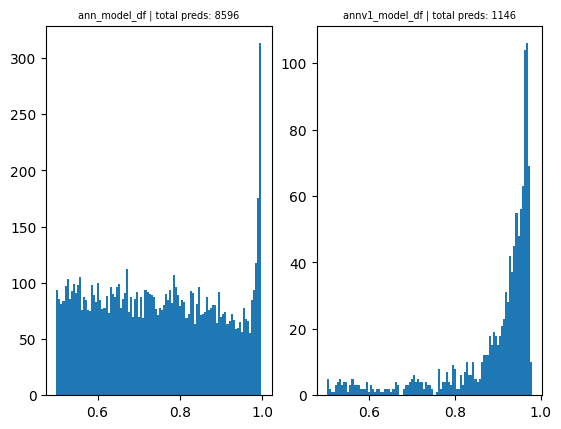

In [19]:
plt.subplot(1, 2, 2)
annv1_pred_probs = annv1_model_df.loc[annv1_model_df['Probability'] != 0, 'Probability']
plt.hist(annv1_pred_probs, bins=100)
plt.title(f'annv1_model_df | total preds: {len(annv1_pred_probs)}', fontsize=7)

plt.subplot(1, 2, 1)
ann_pred_probs = ann_model_df.loc[ann_model_df['Probability'] != 0, 'Probability']
plt.hist(ann_pred_probs, bins=100)
plt.title(f'ann_model_df | total preds: {len(ann_pred_probs)}', fontsize=7)

plt.show() 